## Spam Classifier

<pre>
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
</pre>


### Importing files and Libraries

In [142]:
import numpy as np
import pandas as pd

In [143]:
data = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [144]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Cleaning

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [146]:
data = data[['v1','v2']]

In [147]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
data.rename(columns={'v1':'target',
                     'v2':'text'},inplace=True)

In [149]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder in sklearn is a utility used to convert catrgorical labels or other
#non-numerical data into numerical form. 

In [150]:
encoder = LabelEncoder()

In [151]:
data['target']=encoder.fit_transform(data['target'])

In [152]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [153]:
# Always check for missing values. 

data.isnull().sum()

target    0
text      0
dtype: int64

In [154]:
#check for duplicate values

data.duplicated().sum()

403

In [155]:
#remove duplicates
data = data.drop_duplicates(keep='first')

In [156]:
data.duplicated().sum()

0

## EDA

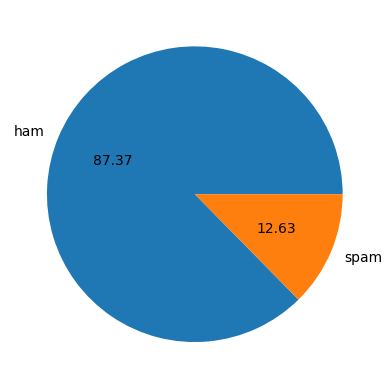

In [157]:
# calculating the percentage of ham and spam
import matplotlib.pyplot as plt 

plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Data is imbalanced

In [62]:
!pip install nltk


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [164]:
#counting number of characters being used in text

data['characters_num'] = data['text'].apply(len)

In [165]:
#counting number of words

data['word_count'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [166]:
#counting number of sentences in each message 

data['sentence_count'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [169]:
data.head()

,target,text,word_count,sentence_count,characters_num
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [170]:
data[['characters_num','word_count','sentence_count']].describe()

,characters_num,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [171]:
#ham messages
data[data['target']==0][['characters_num','word_count','sentence_count']].describe()

,characters_num,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:
#spam messages
data[data['target']==1][['characters_num','word_count','sentence_count']].describe()

,characters_num,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [172]:
import seaborn as sns

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


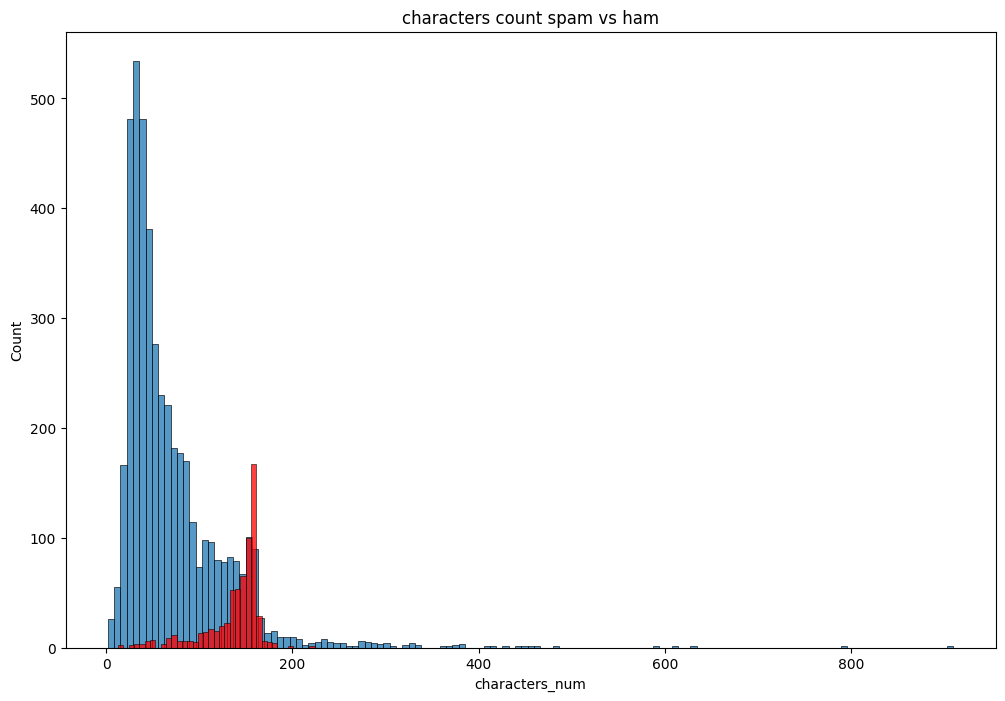

In [173]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']==0]['characters_num'])
sns.histplot(data[data['target']==1]['characters_num'],color='red')
plt.title('characters count spam vs ham')
plt.show()


In [174]:
# from above we can see that number of characters used in ham msg are greater than spam messages

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


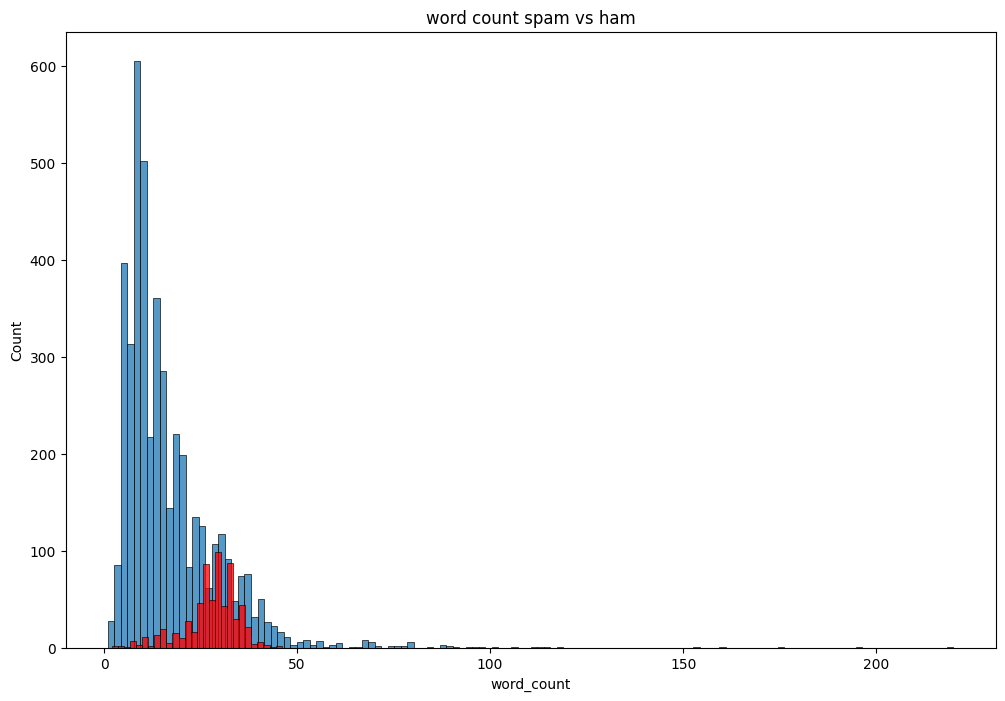

In [175]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target']==0]['word_count'])
sns.histplot(data[data['target']==1]['word_count'],color='red')
plt.title('word count spam vs ham')
plt.show()

c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SANJANA\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


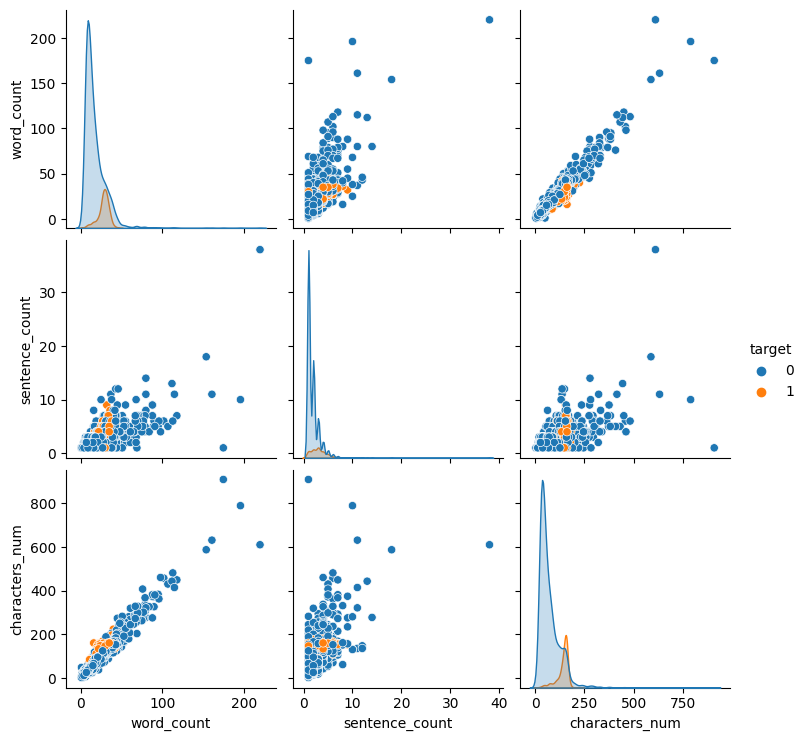

In [180]:
# Relationships between the column

sns.pairplot(data,hue='target')

In [181]:
# we can see outlines in the data. 

<Axes: >

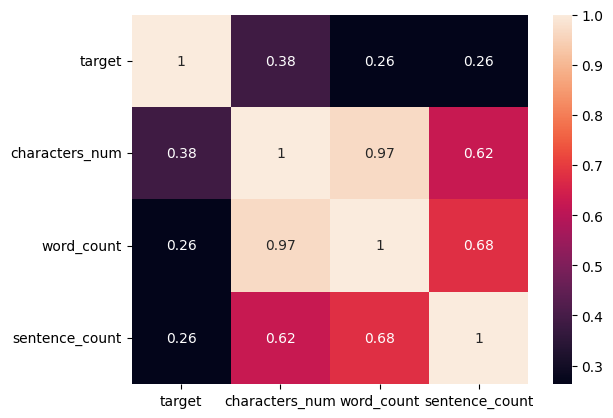

In [182]:
sns.heatmap(data[['target','characters_num','word_count','sentence_count']].corr(),annot=True)

In [183]:
# as the correlation between characters_num, word_count, sentence_count is very high.
# we will only keep one of the columns in our data.
# As the variation of the target with character_num is high. That is the one remaining.

## Data preprocessing

<pre>

Inorder to find the top words used in ham and spam we do the following.

1. Lower case
2. Tokenization
3. Removing Special characters
4. Removing stop words
5. Removing punctuation
6. stemming
</pre>

In [184]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANJANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [185]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()



In [186]:
def text_transformation(text):
    
    #converting to lower and tokenizing
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    #removing punctuation and stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            

    text = y[:]
    y.clear()
    #stemming

    for i in text:
        y.append( ps.stem(i))


    return  " ".join(y)

In [187]:
text_transformation('Hi, how#re you doing megha?')

'hi megha'

In [188]:
data['transformed_text'] = data['text'].apply(text_transformation)

<p>A <b>Wordcloud</b> is a visual representation of the most frequently occuring words in a text or dataset. The size and prominence of each word in the cloud indicate its frequency or importance. </p>

In [193]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=50,background_color='white')

In [194]:
spam_wc=wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))

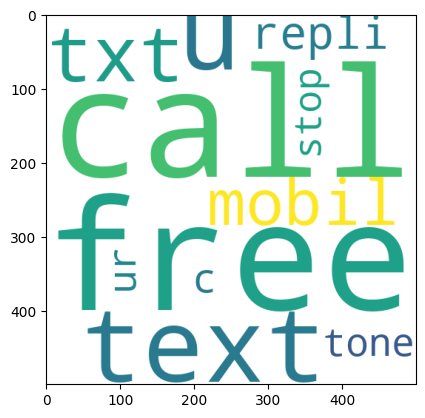

In [195]:
plt.imshow(spam_wc)